In [12]:
pip install pytesseract

In [13]:
pip install keras_ocr

In [80]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import re
from PIL import Image
from google.colab import drive
from pathlib import Path
from typing import List


import pytesseract
import keras_ocr
from pytesseract import Output
from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer
from keras_ocr import pipeline

import xml.etree.ElementTree as ET

In [15]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
FOLDER_PATH = '/content/gdrive/MyDrive/receipts'

DIR_PATH = Path(FOLDER_PATH)

data = list(DIR_PATH.glob('**/*.jpg'))

data = pd.Series(data, name='Paths')

df = pd.DataFrame(data)

df

Paths
0   /content/gdrive/MyDrive/receipts/14.jpg
1    /content/gdrive/MyDrive/receipts/3.jpg
2   /content/gdrive/MyDrive/receipts/12.jpg
3   /content/gdrive/MyDrive/receipts/18.jpg
4   /content/gdrive/MyDrive/receipts/11.jpg
5    /content/gdrive/MyDrive/receipts/9.jpg
6    /content/gdrive/MyDrive/receipts/1.jpg
7    /content/gdrive/MyDrive/receipts/0.jpg
8    /content/gdrive/MyDrive/receipts/7.jpg
9   /content/gdrive/MyDrive/receipts/10.jpg
10   /content/gdrive/MyDrive/receipts/8.jpg
11  /content/gdrive/MyDrive/receipts/15.jpg
12  /content/gdrive/MyDrive/receipts/13.jpg
13   /content/gdrive/MyDrive/receipts/5.jpg
14   /content/gdrive/MyDrive/receipts/2.jpg
15  /content/gdrive/MyDrive/receipts/17.jpg
16   /content/gdrive/MyDrive/receipts/4.jpg
17  /content/gdrive/MyDrive/receipts/16.jpg
18  /content/gdrive/MyDrive/receipts/19.jpg

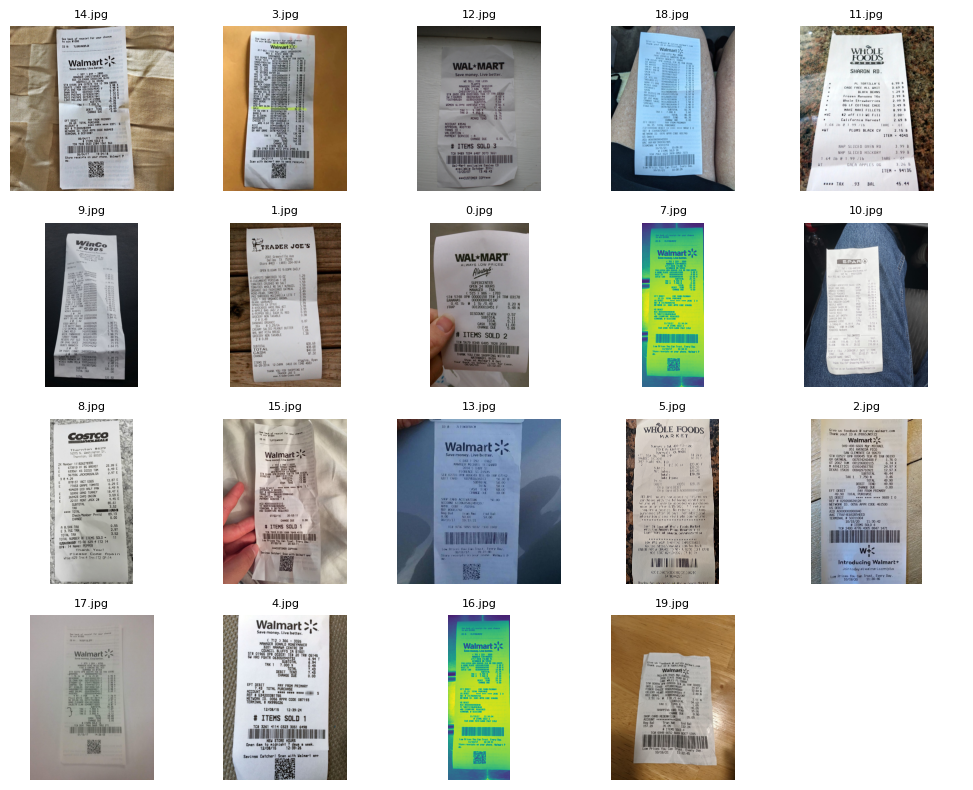

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    if i < len(df):
        img_path = df.iloc[i]['Paths']
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(img_path.name, fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [27]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,128 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,549 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,664 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
G

### pytesseract

In [132]:
def image_to_text_from_df(df):
  random_idx = np.random.randint(0, len(df))
  img_path = df.iloc[random_idx]['Paths']
  img = Image.open(img_path)

  text = pytesseract.image_to_string(img, lang='eng')

  print(text)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  

See back of receipt for your chance
to win $1000
ID #: — 7L2TOWIM25F

   

     
  

Walmart >/<.

Save money. Live better.

( 701 ) 223 - 3066
MANAGER TIM MORRIS
2717 ROCK ISLAND PL
BISMARCK ND 58504
ST# 01534 OP# 009048 TE# 48 TRH 04455

       
      

6 WING PLATE 020108870398 3.98 P
ASST 27 063099656595 4.88 X
CUTIE CAR 063099656644 12.88 X

SUBTOTAL 21.74

TAX 1 6.500 % 1.15

TAX 4 7.500 % 0.30

TOTAL 23.19
DEBIT TEND 23.19
CHANGE DUE 0.00

 

EFT DEBIT PAY FROM PRIMARY
23.19 TOTAL PURCHASE
US DEBIT xxKK xxKK xxxx 2696 I 0

REF # 731700494718
NETWORK ID. 0081 APPR CODE 936886

US DEBIT

AID A0000000980840

TC 58B77239DA5B3B44
*NO SIGNATURE REQUIRED
TERMINAL # SCO11090

11/13/17 12:34:04
# ITEMS SOLD 3
TC# 2188 7274 6444 1567 3762

MUM

ii Low Prices You Can Trust. Every Day.
: 11/13/17 12:34:11
Store receipts on your phone. Walmart P

= |

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



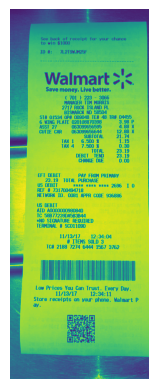

In [42]:
image_to_text_from_df(df)

  

See back of receipt for your chance
to win $1000
ID #: — 7L2TOWIM25F

   

     
  

Walmart >/<.

Save money. Live better.

( 701 ) 223 - 3066
MANAGER TIM MORRIS
2717 ROCK ISLAND PL
BISMARCK ND 58504
ST# 01534 OP# 009048 TE# 48 TRH 04455

       
      

6 WING PLATE 020108870398 3.98 P
ASST 27 063099656595 4.88 X
CUTIE CAR 063099656644 12.88 X

SUBTOTAL 21.74

TAX 1 6.500 % 1.15

TAX 4 7.500 % 0.30

TOTAL 23.19
DEBIT TEND 23.19
CHANGE DUE 0.00

 

EFT DEBIT PAY FROM PRIMARY
23.19 TOTAL PURCHASE
US DEBIT xxKK xxKK xxxx 2696 I 0

REF # 731700494718
NETWORK ID. 0081 APPR CODE 936886

US DEBIT

AID A0000000980840

TC 58B77239DA5B3B44
*NO SIGNATURE REQUIRED
TERMINAL # SCO11090

11/13/17 12:34:04
# ITEMS SOLD 3
TC# 2188 7274 6444 1567 3762

MUM

ii Low Prices You Can Trust. Every Day.
: 11/13/17 12:34:11
Store receipts on your phone. Walmart P

= |

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



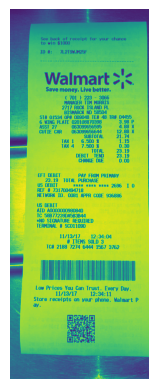

In [58]:
image_to_text_from_df(df)

In [73]:
def only_walmart_images(df: pd.DataFrame) -> List[Path]:
  only_walmart = []
  for i in range(len(df)):
    img_path = df.iloc[i]['Paths']
    walmart_regex = re.compile(r'wal[\*\- ]?mart', re.IGNORECASE)

    img =  Image.open(img_path)

    text = pytesseract.image_to_string(img, lang='eng')

    if walmart_regex.search(text):
      only_walmart.append(img_path)

  return only_walmart

In [82]:
def show_walmart_receipts(image_paths: List[Path]) -> None:
  print(f"Number of walmart receipts: {len(image_paths)}")
  for img_path in image_paths:
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Number of walmart receipts: 13


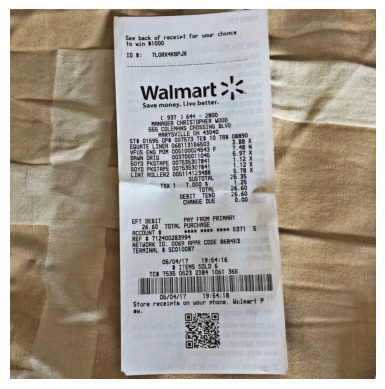

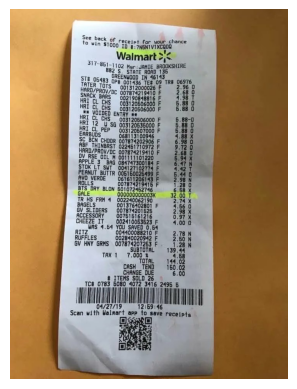

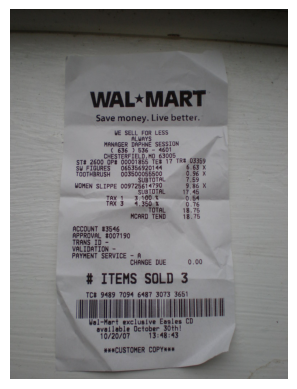

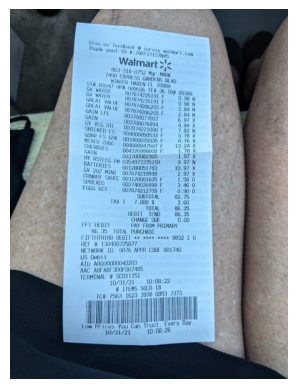

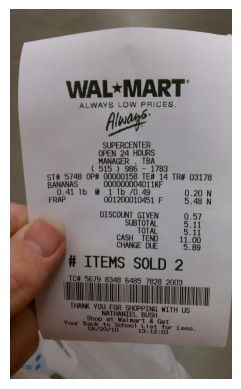

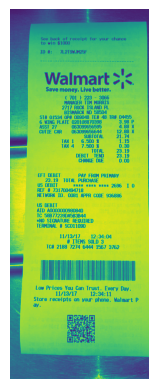

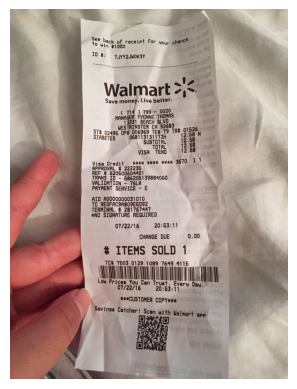

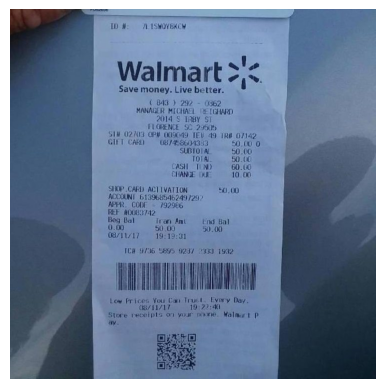

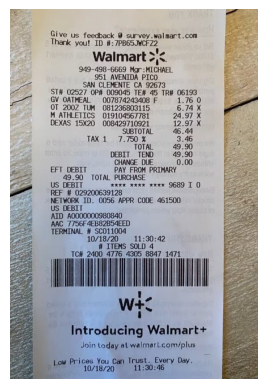

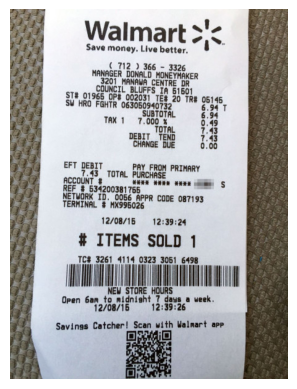

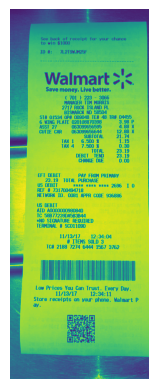

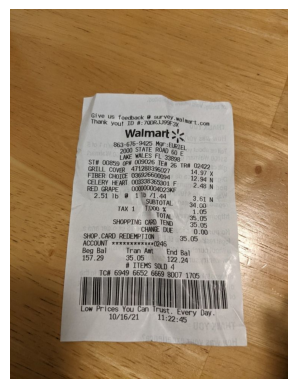

In [83]:
walmart_images = only_walmart_images(df)

show_walmart_receipts(walmart_images)

In [135]:
def images_to_gray(df: pd.DataFrame) -> List[Path]:
    gray_images = []
    for i in range(len(df)):
        img_path = df.iloc[i]['Paths']
        img = cv2.imread(str(img_path))

        img_to_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, img_to_binary = cv2.threshold(img_to_gray, 128, 255, cv2.THRESH_BINARY)

        img_gray_pil = Image.fromarray(img_to_binary)

        gray_img_path = img_path.with_suffix('.png')

        img_gray_pil.save(gray_img_path)

        gray_images.append(gray_img_path)

    return gray_images

In [136]:
data = images_to_gray(df)

data

[PosixPath('/content/gdrive/MyDrive/receipts/14.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/3.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/12.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/18.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/11.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/9.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/1.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/0.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/7.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/10.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/8.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/15.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/13.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/5.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/2.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/17.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/4.png'),
 PosixPath('/content/gdrive/MyDrive/receipts/16.png'),
 PosixPath('/conten

In [137]:
plt.title('GrayScale Image')
plt.imshow(Image.open(data[1]), cmap='gray')
plt.axis('off')
plt.show()

  
    
    
    
     
        
        
     
    
     
    
      
  

See back of receipt for your chance

to win $1000
ID #: 7LORX4K8PUX

a!
Walmart 7,5

Save money. Live better.

( 937 ) 644 - 2800
MANAGER CHRISTOPHER wood
280 CON a aaOH
$s
ST# 01595 OP¥ 007573 TE® 10 TR¥ 08890
EQUATE LINER 068113186503 3.88 X

WFUS ENG POM 005100024543 F 7.48 N
DAWN ORIG — 003700011045 5.97 X
5OYD PKGTAPE 007535307841 1.12 X
BOYD PKGTAPE 007535307841 1.12 X
LINT ROLLER2 005114123488 5.78 X
SUBTOTAL 26.35
ra TiS at
DEBIT TEND 26.60
CHANGE DUE 0.00

      
     
    
    
    
 
     

EFT DEBIT PAY FROM PRIMARY

26.60 TOTAL PURCHASE
wee He: we ITT S

ACCOUNT #
REF ¢ 712400285994
NETWORK ID. 0069 APPR CODE 868483

TERMINAL # SCO10087
05/04/17 19:54:16

   

 

 

 

 

 

 

 

 

 

 

 

 

 

 

ii

Store receipts on your phone. Walmart P
ay.

  



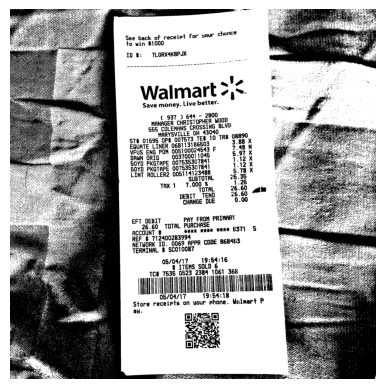

In [138]:
img = Image.open(data[0])

text = pytesseract.image_to_string(img, lang='en')

print(text)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

### Keras_OCR

In [143]:
detector = Detector()
recognizer = Recognizer()

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


5/5 [==============================] - 23s 4s/step


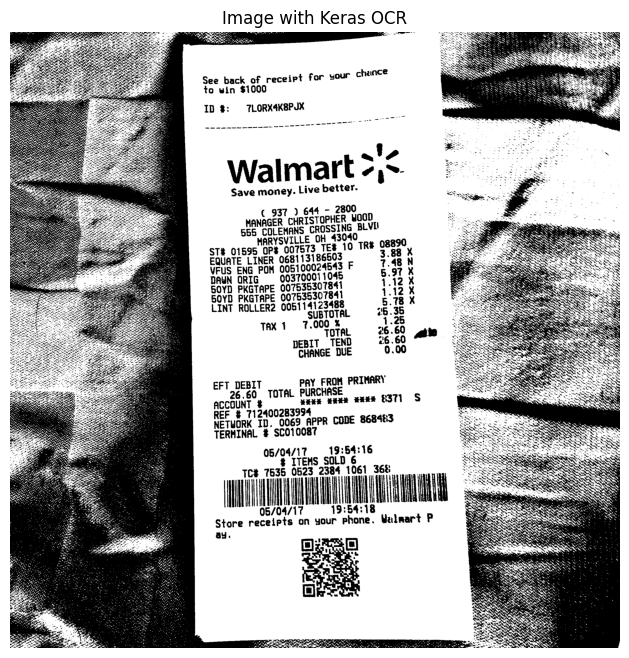

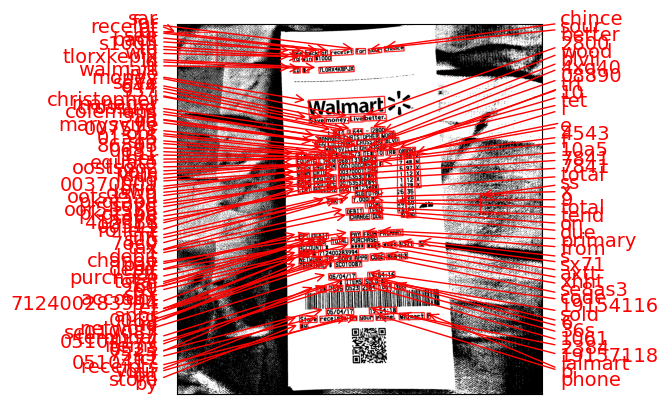

In [156]:
img = keras_ocr.tools.read(str(data[0]))

prediction_groups = pipeline.recognize([img])

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.title('Image with Keras OCR')
plt.axis('off')
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])
plt.show()

In [154]:
all_text = ''

for text, _ in prediction_groups[0]:
  all_text += text + ' '

all_text

'chunce for recelpt your stx bagt df td sl ooo win tkzgfisleff id ta walmart save eive better money 4td 769 97s j manager mike eidlinger 1e8 s caminc rio i del durango 81303 cg ojo89 ozz70 sth opt do01 tex cz trs 14 pananas ocoonqoonot 1k1  i te ib fc e9 i t le beverage 207iz0s q0j71 f f cran ds pom 001 f 712200 stribry cc 07541 21 t i canpari tok ot744t601 kft singles 0021q006 528 14600182111 f qaeo11z1 f salami 0206331t 343 hard go 4ski avocado oocgoooo fq i at  1 for q 1 pills white ogsi7117615 e f sh hylon dofaitoziejzs col hano oqoo6 cleaner dda1 261 injectr s clnr cabot1 00o3 sue total st tax 900 t l t ood 6 tax 8 y 9qg o tax 2 x total gx tend 40 cash change dlie z sold items 16 3011 taen 2i7 tci 7466 06e9 i a 01118417 261 103 '